# Onur Poyraz

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 6, 6
sns.set_style("white")
np.set_printoptions(precision=2,suppress=True)

## Gibbs Sampler

\begin{eqnarray}
p(Z \mid Z_{-}) & = & \frac{p(Z, Z_{-})}{p(Z_{-})} \\
& \propto & p(Z, Z_{-}) \\
& = & p(Z) p(Z_{-} \mid Z)\\
& \propto & \exp{\left(\beta \sum_{(i,j)\sim (k,l)} Z_{ij} Z_{kl} \right)} \beta
\end{eqnarray}

In [2]:
X = np.random.rand(128,128)
X = 2*(X > 0.5).astype(int)-1

In [3]:
def gibbs_sampler(img, beta, T):
    Z = img.copy()
    I,J = Z.shape
    for t in range(T):
        i,j = np.random.choice(I), np.random.choice(J)
        delta_E = -2*beta*Z[i,j]*(np.sum(Z[max(i-1,0):i+2,max(j-1,0):j+2]) - Z[i,j])
        if np.log(np.random.rand()) < delta_E:
            Z[i,j] = - Z[i,j]
    return Z

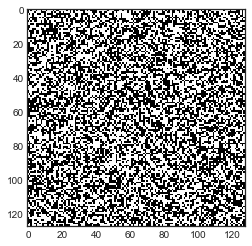

In [4]:
beta = 0.01
T = 500000

plt.imshow(gibbs_sampler(X, beta, T), cmap='gray', vmin=-1, vmax=1)
plt.show()

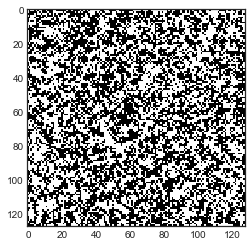

In [5]:
beta = 0.1
T = 500000

plt.imshow(gibbs_sampler(X, beta, T), cmap='gray', vmin=-1, vmax=1)
plt.show()

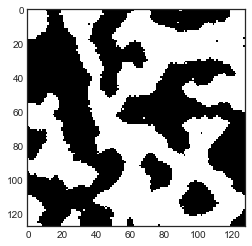

In [6]:
beta = 0.5
T = 500000

plt.imshow(gibbs_sampler(X, beta, T), cmap='gray', vmin=-1, vmax=1)
plt.show()

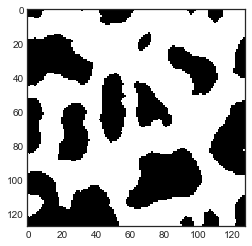

In [7]:
beta = 1
T = 500000

plt.imshow(gibbs_sampler(X, beta, T), cmap='gray', vmin=-1, vmax=1)
plt.show()

##  Image Denoising

In [8]:
noisy_image = plt.imread('./image/lena.pgm')
noisy_image = 2*(noisy_image > 127).astype(int)-1

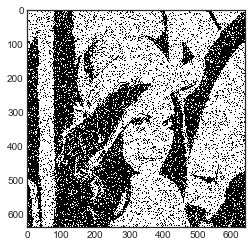

In [9]:
plt.imshow(noisy_image,cmap='gray',vmin=-1,vmax=1)
plt.show()

\begin{eqnarray}
p(Z \mid X, Z_{-}) & = & \frac{p(Z, X ,Z_{-})}{p(X) p(Z_{-})} \\
& \propto & p(Z, X , Z_{-}) \\
& = & p(Z) p(Z_{-} \mid Z) p(X \mid Z) \\
& \propto & \exp{\left(\beta \sum_{(i,j)\sim (k,l)} Z_{ij} Z_{kl} \right)} \beta
\prod_{ij} \pi^{(1 - X_{ij}Z_{ij})/2} (1-\pi)^{(X_{ij}Z_{ij} + 1)/2}  \\
& \propto & \exp{\left( \gamma \sum_{ij} Z_{ij} X_{ij} + \beta \sum_{(i,j)\sim (k,l)} Z_{ij} Z_{kl} \right)} \beta
\end{eqnarray}

where $\gamma = \dfrac{1}{2} \log{\dfrac{1-\pi}{\pi}}$, but from now on instead of $\pi$ we will use the parametrization with $\gamma$.

In [10]:
def denoiser(img, beta, gamma, T):
    denoised_image = img.copy()
    I,J = denoised_image.shape
    for t in range(T):
        i,j = np.random.choice(I), np.random.choice(J)
        delta_E = -2*gamma*noisy_image[i,j]*denoised_image[i,j] -2*beta*denoised_image[i,j]*(np.sum(denoised_image[max(i-1,0):i+2,max(j-1,0):j+2]) - denoised_image[i,j])
        if np.log(np.random.rand()) < delta_E:
            denoised_image[i,j] = - denoised_image[i,j] 
    return denoised_image

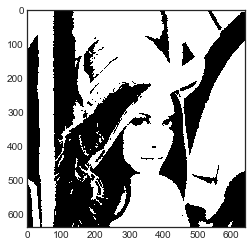

In [11]:
beta = 0.8
gamma = 2.0
T = 5000000
plt.imshow(denoiser(noisy_image, beta, gamma, T), cmap='gray', vmin=-1, vmax=1)
plt.show()

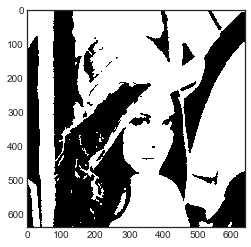

In [12]:
beta = 1.6
gamma = 2.0
T = 5000000
plt.imshow(denoiser(noisy_image, beta, gamma, T), cmap='gray', vmin=-1, vmax=1)
plt.show()

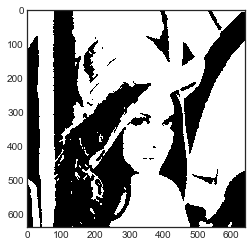

In [13]:
beta = 0.8
gamma = 1.0
T = 5000000
plt.imshow(denoiser(noisy_image, beta, gamma, T), cmap='gray', vmin=-1, vmax=1)
plt.show()